<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BT_V_aditya%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análise dos Dados do Airbnb - *SANTA CLARA - CA - USA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade SANTA CLARA - CALIFORIA - USA, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Santa Clara County na Califronia é a cidade com o terceiro maior GDP per capita (PIB) do mundo. É um polo tecnológio próximo a Baía de San Francisco, ou seja, praticamente na Sillicon Valley. Devido a isso analisar locações de imóveis por AirBnB pode ser interessante. É uma cidade com um grande fluxo de pessoas que vem para trabalhar para ficar permanentemente ou temporariamente, tornando-se uma cidade rentável para o mundo imobiliário.**

## Obtenção dos Dados


In [38]:
# importar os pacotes necessarios
import pandas as pd


In [39]:
# importar o arquivo listings.csv para um DataFrame
# http://data.insideairbnb.com/united-states/ca/santa-clara-county/2021-07-14/visualisations/listings.csv
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/santa-clara-county/2021-07-14/visualisations/listings.csv")

print(df.shape)
# print(df.columns)
print(df.dtypes)


(5036, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Análise dos Dados


**Dicionário das variáveis**

* id: identidicação única do imóvel
* name: nome da propriedade
* host_id: identificador do proprietário
* host_name: Nome do locador
* neighbourhood_group: Nenhum valor
* neighbourhood: nome do bairro ou vizinhança
* latitude: coordenada latitude
* longitude: coordenada longitude
* room_type: qual o tipo do quarto
* price: tarifa de locação
* minimum_nights: minimo de noites para reserva
* number_of_reviews: numero de avaliações
* last_review: utlima avaliação
* reviews_per_month: avaliações por mês
* calculated_host_listings_count: quantidade de imoveis do locador
* availability_365: numero de dias disponiveis durante os 365 do ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [40]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11464,Deluxe Studio 5 min. to SC Kaiser & Apple Park,42458,Emey,NaN,Santa Clara,37.34415,-121.98701,Entire home/apt,85,4,9,2021-02-20,0.26,17,125
1,21373,Bonsai Garden Inn in Professorville,7054,Mei Lin,NaN,Palo Alto,37.43972,-122.15532,Private room,80,2,264,2020-03-14,6.66,4,134
2,37512,Private room - Parking 3 carport,161741,Maria,NaN,San Jose,37.30423,-121.84088,Private room,48,1,183,2017-03-14,2.39,2,136
3,52786,Cozy Room in A Quiet Community,161741,Maria,NaN,San Jose,37.30521,-121.84149,Private room,50,1,478,2020-03-11,3.84,2,75
4,62799,Zen Office and Sofa in Palo Alto,7054,Mei Lin,NaN,Palo Alto,37.43934,-122.15723,Private room,100,7,148,2020-02-15,2.75,4,134


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [41]:
# identificar o volume de dados do DataFrame
rows = df.shape[0]
columns = df.shape[1]

print(f"O dataset possui {rows} entradas e {columns} variaveis(atributos).\n\n")

# verificar as 5 primeiras entradas do dataset
print(f"Verificando os tipos das 5 primeiras entradas:\n\n{df.dtypes.head()}")


O dataset possui 5036 entradas e 16 variaveis(atributos).


Verificando os tipos das 5 primeiras entradas:

id                       int64
name                    object
host_id                  int64
host_name               object
neighbourhood_group    float64
dtype: object


In [42]:
# vamos pegar as estatisticas dos atributos numericos eliminando as que não fazem muito sentido
df.drop(['id', 'host_id', 'neighbourhood_group'], axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,3883.000000,5036.000000,5036.000000
mean,37.348890,-121.964060,196.885822,11.300437,30.530778,2.120896,25.563542,208.676132
std,0.066713,0.110620,803.007871,21.370261,57.034501,5.760218,56.357006,123.798249
min,36.965600,-122.189349,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,37.318922,-122.038434,65.000000,1.000000,1.000000,0.300000,1.000000,89.000000
50%,37.354325,-121.959465,119.000000,3.000000,7.000000,0.890000,3.000000,194.000000
75%,37.394813,-121.884935,193.000000,20.000000,32.000000,2.210000,12.000000,336.000000
max,37.459370,-121.380120,25000.000000,365.000000,571.000000,208.000000,231.000000,365.000000


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [43]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/rows).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.228952
last_review                       0.228952
name                              0.000199
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Vemos que os atributos reviews_per_month e last_review contém alguns valores ausentes 22,9% , a principio isso não deve comprometer a nossa análise baśica portanto não iremos fazer nenhum tratamento nesse momento.

### **Q3. Qual o tipo de distribuição das variáveis?** 

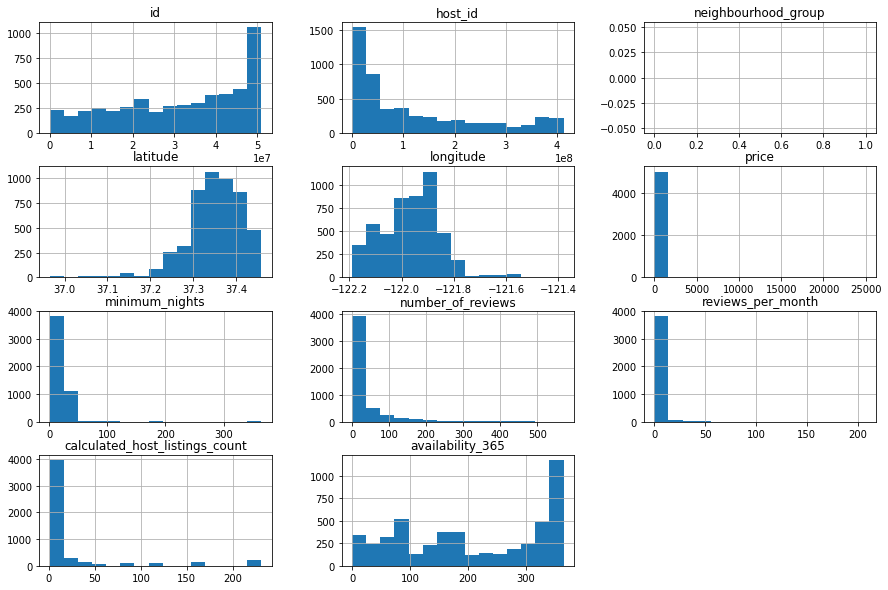

In [44]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

Dois atributos importantes para esta analise seriam o numero minimo de noites (minimum nights) e o numero de avaliações ( number_of_reviews ). Com o primeiro saberemos o tempo minimo de estadia e usar para entender se a pessoa veio temporariamente ( tipo, resolver um pequeno problema ) ou se veio para mais tempo. Por não termos no conjunto de dados nenhum atributo que nos mostra o quantidade de locações do imóvel o atributo com o numero de avaliações pode ser um bom indicativo para isso, afinal se tem um numero alto de avaliçaões talvez seja pq tenha um numero alto de locações.

### **Q4. Qual a média dos preços de aluguel?**

In [45]:
# ver a média da coluna `price``
df.price.mean()

196.88582208101667

### **Q4. Qual a correlação existente entre as variáveis**

In [46]:
# criar list de colunas numericas para gerar uma matriza de correlação
numeric_cols = df.select_dtypes(include='number')
numeric_cols = numeric_cols.columns.drop(['id', 'host_id','neighbourhood_group'])
numeric_cols

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [47]:

# criar uma matriz de correlação
corr = df[numeric_cols].corr()

# mostrar a matriz de correlação
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.624158,0.035820,0.046810,-0.058567,-0.040283,0.079295,-0.019047
longitude,-0.624158,1.000000,-0.071668,-0.065174,0.014039,0.056736,-0.078325,-0.004419
price,0.035820,-0.071668,1.000000,-0.017713,-0.029834,0.004996,-0.011165,-0.028633
minimum_nights,0.046810,-0.065174,-0.017713,1.000000,-0.156455,-0.110969,0.312688,0.215565
number_of_reviews,-0.058567,0.014039,-0.029834,-0.156455,1.000000,0.316278,-0.193441,-0.082031
reviews_per_month,-0.040283,0.056736,0.004996,-0.110969,0.316278,1.000000,-0.086522,-0.075255
calculated_host_listings_count,0.079295,-0.078325,-0.011165,0.312688,-0.193441,-0.086522,1.000000,0.236644
availability_365,-0.019047,-0.004419,-0.028633,0.215565,-0.082031,-0.075255,0.236644,1.000000


In [48]:
# importar bibliotcas necessárias para gerar um mapa de calor (heatmap)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

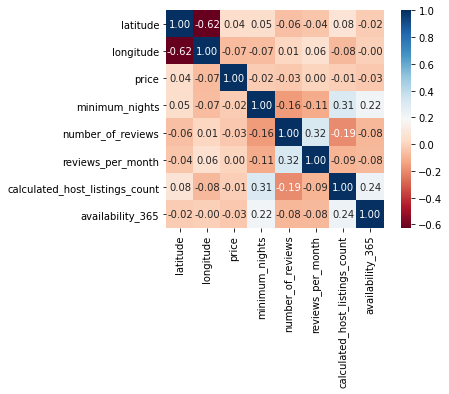

In [49]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Nenhuma correlação alta entre os atributos, num proximo passo podemos converter o atributo nominal 'neighbourhood' em numerico e procurar alguma correlação certamente por ser uma cidade polo tecnologico os bairros mais proximos das empresas terão mais locações ( hipotese a provar futuramente )

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [50]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    2817
Private room       2078
Shared room         140
Hotel room            1
Name: room_type, dtype: int64

In [51]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/rows

Entire home/apt    0.559373
Private room       0.412629
Shared room        0.027800
Hotel room         0.000199
Name: room_type, dtype: float64

Vemos que 56% das locações são de um apartamento ou casa inteira, isso pode ser um indício de uma família se mudando para a cidade e usando o AirBnB temporariamente até achar outro imovel. Temos 41% para Quartos Privados (private rooms) indicando possivelmente pessoas que vem passar curtos períodos.

### **Q6. Qual a localidade mais cara do dataset?**



In [52]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Palo Alto               453.621951
Saratoga                377.456522
Los Altos Hills         324.166667
Unincorporated Areas    260.213974
Mountain View           199.741071
Los Altos               196.166667
Santa Clara             187.054795
Campbell                180.311828
Los Gatos               176.962963
Monte Sereno            173.076923
Gilroy                  168.214286
Cupertino               160.592593
Milpitas                154.619048
San Jose                142.133460
Sunnyvale               125.753507
Morgan Hill             105.285714
Name: price, dtype: float64

**Palo Alto**, é um das cidades que possuem mais empresas de tecnologia além da Stanford University, tornando se assim um lugar bem valorizado por isso o alto preço de locação. É conhecida por ser uma das cidades de maior custo de vida dos EUA e tambem de maior nivel educacional, ja foi o HQ de grandes empresas como Google, Apple, Facebook, Paypal entre outras.

**Saratoga** , é uma das cidades com as casas mais caras dos EUA e está entre as cidades mais ricas do país. Muitas pessoas que trabalham no Vale do Silicio moram em Saratoga, pode ser considerado uma cidade dormitório para a classe média alta.

**Los Altos Hills**, é uma cidade curiosa por ser estritamente residencial, tem apenas dois comércios uma loja de livros para suportar a escola local e uma loja de presentes. Por causa disso tornou se um dos com casas num preço médio altíssimo 7.7 milhoẽs de dólares.

Por estas razões concluímos que é natural que o preço de locação seja os mais altos e com uma diferença grande para Mountain View por exemplo onde atualmente hoje está sediado o Google ( uma das sedes ).

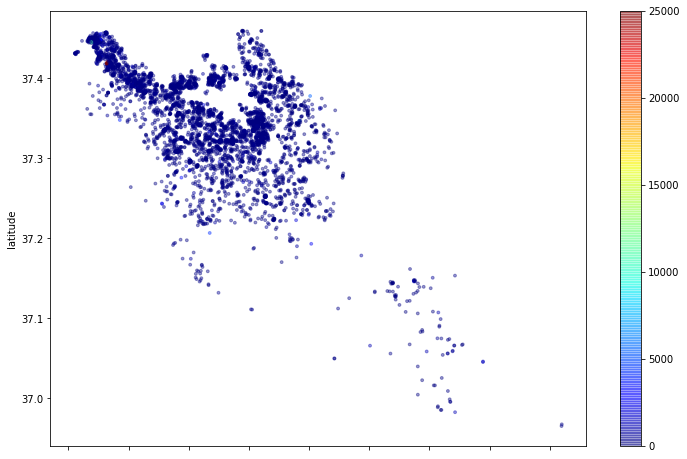

In [53]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [54]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

11.300436854646545

In [55]:
df.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)

room_type
Entire home/apt    13.988995
Shared room        12.135714
Private room        7.604427
Hotel room          1.000000
Name: minimum_nights, dtype: float64

A média geral como podemos ver é de 11 noites. Se separarmos vemos que os quartos privados (Private Rooms) possume uma media de 7.6 noites, o que reforça nossa hipótese que são locados por quem vem trabalhar na cidade por pouco tempo.
Já o apartamento inteiro quase 14 noites, provavelmente familias que se mudam e usam AirBnB até achar algo maior... a nossa outra hipótese sendo reforçada aqui.

In [56]:
df.groupby(['neighbourhood']).number_of_reviews.mean().sort_values(ascending=False)

neighbourhood
Monte Sereno            65.307692
Unincorporated Areas    57.641921
Los Gatos               50.111111
Los Altos               40.095238
Los Altos Hills         38.566667
Saratoga                36.260870
Campbell                36.053763
Palo Alto               34.064460
San Jose                32.004766
Mountain View           27.140625
Gilroy                  24.857143
Santa Clara             22.500978
Sunnyvale               22.444890
Cupertino               21.275132
Milpitas                16.898810
Morgan Hill             13.285714
Name: number_of_reviews, dtype: float64

**Monte Sereno**, é natural que seja o com mais reviews, segundo nossa hipótese se tem mais reviews é pq tem mais locações. É tambem uma comunidade puramente residencial sem pontos comerciais... e o mais curioso 99% é habitado por familias ou casais, é considerado também uma das cidades dormitório para quem trabalha no Silicon Valley.

Uma curiosidade são as Unincorporated Areas, que são locais que não pertencem a uma cidade e pode ter desde bairros pobre a bairros riquissimos. Abaixo comparamos com Mountain View e vemos que os preços se comportam de maneira similar.

In [58]:
df[df.neighbourhood=='Unincorporated Areas'].price.describe()

count     229.000000
mean      260.213974
std       537.294426
min         0.000000
25%        80.000000
50%       130.000000
75%       232.000000
max      5500.000000
Name: price, dtype: float64

In [60]:
df[df.neighbourhood=='Mountain View'].price.describe()

count     448.000000
mean      199.741071
std       157.570395
min        27.000000
25%       100.000000
50%       166.500000
75%       259.250000
max      1475.000000
Name: price, dtype: float64

## Conclusões


Com os questionamentos acima tivemos um bom reforço para as hipóteses que levantamos. Mesmo com poucos atributos temos uma boa intuição do que podemos fazer com esses dados e quem sabe no futuro orientar o AirBnB em suas decisões e entendermos como funciona esse mercado em determinada localidade.
Alguns atributos como numero de locações e outros relacionados ao perfil do locatário poderiam ajudar muito nas análises.
Para uma análise descritiva inicial é um bom conjunto de dados.
